In [2223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

In [2224]:
plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams['lines.markersize'] = 1.5
plt.rcParams['font.size'] = 7.0
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = [r'\usepackage{lmodern}']
plt.rcParams['axes.linewidth'] = 0.5

# grid
plt.rcParams['grid.linestyle'] = "solid"
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['grid.color'] = "e0e0e0"

# axis ticks
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['xtick.minor.width'] = 0.5
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['ytick.minor.width'] = 0.5
plt.rcParams['xtick.major.size'] = 2.0
plt.rcParams['xtick.minor.size'] = 1.0
plt.rcParams['ytick.major.size'] = 2.0
plt.rcParams['ytick.minor.size'] = 1.0

# legend
plt.rcParams['legend.fontsize'] = "small"
plt.rcParams['legend.framealpha'] = 1.0
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.handlelength'] = 1.5
plt.rcParams['legend.handletextpad'] = 0.5
plt.rcParams['legend.columnspacing'] = 0.5
plt.rcParams['legend.handleheight'] = 0.5

In [2225]:
data = pd.read_csv("parsed_eval_results.csv", index_col=0)

### Influence of Detector Threshold

In [2186]:
baseline = data[data.tracker_type.isin(["baseline"]) & data.scale.isin([1.0])]
baseline = baseline.sort_values("det_interval", axis=0, ascending=True, na_position='last')

deep_upsampled = data[data.tracker_type.isin(["deep"]) & data.mvs_mode.isin(["upsampled"]) & data.scale.isin([1.0])]
deep_upsampled = deep_upsampled.sort_values("det_interval", axis=0, ascending=True, na_position='last')

deep_dense = data[data.tracker_type.isin(["deep"]) & data.mvs_mode.isin(["dense"]) & data.scale.isin([1.0])]
deep_dense = deep_dense.sort_values("det_interval", axis=0, ascending=True, na_position='last')

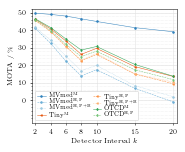

In [2193]:
f, ax = plt.subplots(1, 1, figsize=(2.6,2.1))  # (3, 2.3) for very small plot

cmap = cm.get_cmap('tab20c')

# Baseline
mask = baseline.codec.isin(["mpeg4"]) & baseline.vector_type.isin(["p", np.nan])
ax.plot(baseline[mask]["det_interval"], baseline[mask]["MOTA"]*100.0, marker="o", color=cmap(0))
mask = baseline.codec.isin(["h264"]) & baseline.vector_type.isin(["p", np.nan])
ax.plot(baseline[mask]["det_interval"], baseline[mask]["MOTA"]*100.0, marker="o", linestyle="--", color=cmap(1))
mask = baseline.codec.isin(["h264"]) & baseline.vector_type.isin(["p+b"])
ax.plot(baseline[mask]["det_interval"], baseline[mask]["MOTA"]*100.0, marker="o", linestyle=":", color=cmap(2))

# Tiny T-CNN
mask = deep_dense.codec.isin(["mpeg4"]) & deep_dense.vector_type.isin(["p", np.nan])
ax.plot(deep_dense[mask]["det_interval"], deep_dense[mask]["MOTA"]*100.0, marker="<", color=cmap(4))
mask = deep_dense.codec.isin(["h264"]) & deep_dense.vector_type.isin(["p", np.nan])
ax.plot(deep_dense[mask]["det_interval"], deep_dense[mask]["MOTA"]*100.0, marker="<", linestyle="--", color=cmap(5))
mask = deep_dense.codec.isin(["h264"]) & deep_dense.vector_type.isin(["p+b"])
ax.plot(deep_dense[mask]["det_interval"], deep_dense[mask]["MOTA"]*100.0, marker="<", linestyle=":", color=cmap(6))

# OTCD T-CNN
mask = deep_upsampled.codec.isin(["mpeg4"]) & deep_upsampled.vector_type.isin(["p", np.nan])
ax.plot(deep_upsampled[mask]["det_interval"], deep_upsampled[mask]["MOTA"]*100.0, marker="d", color=cmap(8))
mask = deep_upsampled.codec.isin(["h264"]) & deep_upsampled.vector_type.isin(["p", np.nan])
ax.plot(deep_upsampled[mask]["det_interval"], deep_upsampled[mask]["MOTA"]*100.0, marker="d", linestyle="--", color=cmap(9))

#leg = ax.legend(["MVmed (MPEG4)", "MVmed (H.264, P)", "MVmed (H.264, P+B)", "Tiny T-CNN (MPEG4)", "Tiny T-CNN (H.264, P)", 
#           "Tiny T-CNN (H.264, P+B)", "OTCD T-CNN (MPEG4)", "OTCD T-CNN (H.264, P)"], ncol=2)
leg = ax.legend([r"MVmed\textsuperscript{M}", r"MVmed\textsuperscript{H,P}", r"MVmed\textsuperscript{H,P+B}", r"Tiny\textsuperscript{M}", r"Tiny\textsuperscript{H,P}", 
           r"Tiny\textsuperscript{H,P+B}", r"OTCD\textsuperscript{M}", r"OTCD\textsuperscript{H,P}"], ncol=2)
leg.get_frame().set_linewidth(0.5)
ax.set_ylabel("MOTA / \%")
ax.set_xlabel("Detector Interval $k$")
ax.set_xticks([2, 4, 6, 8, 10, 15, 20])
ax.set_yticks(np.arange(0, 51, 10))
ax.set_yticks(np.arange(-10, 101, 2), minor=True)
ax.set_xlim([1.5, 20.5])
ax.set_ylim([-13, 52])
ax.grid(which='major')
ax.grid(which='minor', linestyle="dotted")
ax.set_axisbelow(True)

plt.savefig("plot_det_interval.pdf", bbox_inches="tight", pad_inches=0.01)
plt.show()

### Influence of Input Scale

In [2216]:
k = 10
baseline = data[data.tracker_type.isin(["baseline"]) & data.det_interval.isin([k])]
baseline = baseline.sort_values("scale", axis=0, ascending=True, na_position='last')

deep_upsampled = data[data.tracker_type.isin(["deep"]) & data.mvs_mode.isin(["upsampled"]) & data.det_interval.isin([k])]
deep_upsampled = deep_upsampled.sort_values("scale", axis=0, ascending=True, na_position='last')

deep_dense = data[data.tracker_type.isin(["deep"]) & data.mvs_mode.isin(["dense"]) & data.det_interval.isin([k])]
deep_dense = deep_dense.sort_values("scale", axis=0, ascending=True, na_position='last')

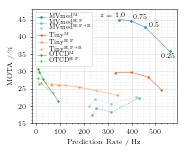

In [2217]:
f, ax = plt.subplots(1, 1, figsize=(2.6,2.1))

cmap = cm.get_cmap('tab20c')

# Baseline
mask = baseline.codec.isin(["mpeg4"]) & baseline.vector_type.isin(["p", np.nan])
relative_predict_fps_mean = baseline[mask]["predict_fps_mean"]
ax.plot(relative_predict_fps_mean, baseline[mask]["MOTA"]*100.0, marker="o", color=cmap(0))

mask = baseline.codec.isin(["h264"]) & baseline.vector_type.isin(["p", np.nan])
relative_predict_fps_mean = baseline[mask]["predict_fps_mean"]
ax.plot(relative_predict_fps_mean, baseline[mask]["MOTA"]*100.0, marker="o", linestyle="--", color=cmap(1))

mask = baseline.codec.isin(["h264"]) & baseline.vector_type.isin(["p+b"])
relative_predict_fps_mean = baseline[mask]["predict_fps_mean"]
ax.plot(relative_predict_fps_mean, baseline[mask]["MOTA"]*100.0, marker="o", linestyle=":", color=cmap(2))

# Tiny T-CNN
mask = deep_dense.codec.isin(["mpeg4"]) & deep_dense.vector_type.isin(["p", np.nan])
relative_predict_fps_mean = deep_dense[mask]["predict_fps_mean"]
ax.plot(relative_predict_fps_mean, deep_dense[mask]["MOTA"]*100.0, marker="<", color=cmap(4))

mask = deep_dense.codec.isin(["h264"]) & deep_dense.vector_type.isin(["p", np.nan])
relative_predict_fps_mean = deep_dense[mask]["predict_fps_mean"]
ax.plot(relative_predict_fps_mean, deep_dense[mask]["MOTA"]*100.0, marker="<", linestyle="--", color=cmap(5))

mask = deep_dense.codec.isin(["h264"]) & deep_dense.vector_type.isin(["p+b"])
relative_predict_fps_mean = deep_dense[mask]["predict_fps_mean"]
ax.plot(relative_predict_fps_mean, deep_dense[mask]["MOTA"]*100.0, marker="<", linestyle=":", color=cmap(6))

# OTCD T-CNN
mask = deep_upsampled.codec.isin(["mpeg4"]) & deep_upsampled.vector_type.isin(["p", np.nan])
relative_predict_fps_mean = deep_upsampled[mask]["predict_fps_mean"]
ax.plot(relative_predict_fps_mean, deep_upsampled[mask]["MOTA"]*100.0, marker="d", color=cmap(8))

mask = deep_upsampled.codec.isin(["h264"]) & deep_upsampled.vector_type.isin(["p", np.nan])
relative_predict_fps_mean = deep_upsampled[mask]["predict_fps_mean"]
ax.plot(relative_predict_fps_mean, deep_upsampled[mask]["MOTA"]*100.0, marker="d", linestyle="--", color=cmap(9))

#leg = ax.legend(["MVmed (MPEG4)", "MVmed (H.264, P)", "MVmed (H.264, P+B)", "Tiny T-CNN (MPEG4)", "Tiny T-CNN (H.264, P)", 
#           "Tiny T-CNN (H.264, P+B)", "OTCD T-CNN (MPEG4)", "OTCD T-CNN (H.264, P)"], ncol=1)
leg = ax.legend([r"MVmed\textsuperscript{M}", r"MVmed\textsuperscript{H,P}", r"MVmed\textsuperscript{H,P+B}", r"Tiny\textsuperscript{M}", r"Tiny\textsuperscript{H,P}", 
           r"Tiny\textsuperscript{H,P+B}", r"OTCD\textsuperscript{M}", r"OTCD\textsuperscript{H,P}"], ncol=1)
leg.get_frame().set_linewidth(0.5)
ax.set_ylabel("MOTA / \%")
ax.set_xlabel("Prediction Rate / Hz")
ax.set_xticks(np.arange(0, 701, 100))
ax.set_xticks(np.arange(0, 1001, 25), minor=True)
ax.set_yticks(np.arange(0, 101, 5))
ax.set_yticks(np.arange(0, 101, 1), minor=True)
ax.set_xlim([-20, 590])
ax.set_ylim([15, 48])
ax.grid(which='major')
ax.grid(which='minor', linestyle="dotted")
ax.set_axisbelow(True)

# write text for scale values
plt.text(0.47, 0.935, r'$z=1.0$', transform=ax.transAxes)
plt.text(0.7, 0.91, r'$0.75$', transform=ax.transAxes)
plt.text(0.81, 0.84, r'$0.5$', transform=ax.transAxes)
plt.text(0.89, 0.57, r'$0.25$', transform=ax.transAxes)

plt.savefig("plot_scaling_factor.pdf", bbox_inches="tight", pad_inches=0.01)
plt.show()

### Inference Time

In [2219]:
k = 10
baseline = data[data.tracker_type.isin(["baseline"]) & data.det_interval.isin([k])]
baseline = baseline.sort_values("scale", axis=0, ascending=True, na_position='last')

deep_upsampled = data[data.tracker_type.isin(["deep"]) & data.mvs_mode.isin(["upsampled"]) & data.det_interval.isin([k])]
deep_upsampled = deep_upsampled.sort_values("scale", axis=0, ascending=True, na_position='last')

deep_dense = data[data.tracker_type.isin(["deep"]) & data.mvs_mode.isin(["dense"]) & data.det_interval.isin([k])]
deep_dense = deep_dense.sort_values("scale", axis=0, ascending=True, na_position='last')

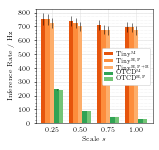

In [2220]:
f, ax = plt.subplots(1, 1, figsize=(2.1,2.1))

cmap = cm.get_cmap('tab20c')
xs = np.array([0.25, 0.5, 0.75, 1.0])
width = 0.04

# Tiny T-CNN
mask = deep_dense.codec.isin(["mpeg4"]) & deep_dense.vector_type.isin(["p", np.nan])
ax.bar(xs-2*width, deep_dense[mask]["inference_fps_mean"], width=width, yerr=deep_dense[mask]["inference_fps_std"], color=cmap(4))

mask = deep_dense.codec.isin(["h264"]) & deep_dense.vector_type.isin(["p", np.nan])
ax.bar(xs-width, deep_dense[mask]["inference_fps_mean"], width=width, yerr=deep_dense[mask]["inference_fps_std"], color=cmap(5))

mask = deep_dense.codec.isin(["h264"]) & deep_dense.vector_type.isin(["p+b"])
ax.bar(xs, deep_dense[mask]["inference_fps_mean"], width=width, yerr=deep_dense[mask]["inference_fps_std"], color=cmap(6))

# OTCD T-CNN
mask = deep_upsampled.codec.isin(["mpeg4"]) & deep_upsampled.vector_type.isin(["p", np.nan])
ax.bar(xs+width, deep_upsampled[mask]["inference_fps_mean"], width=width, yerr=deep_upsampled[mask]["inference_fps_std"], color=cmap(8))

mask = deep_upsampled.codec.isin(["h264"]) & deep_upsampled.vector_type.isin(["p", np.nan])
ax.bar(xs+2*width, deep_upsampled[mask]["inference_fps_mean"], width=width, yerr=deep_upsampled[mask]["inference_fps_std"], color=cmap(9))

#leg = ax.legend(["Tiny T-CNN (MPEG4)", "Tiny T-CNN (H.264, P)", "Tiny T-CNN (H.264, P+B)", "OTCD T-CNN (MPEG4)", "OTCD T-CNN (H.264, P)"], ncol=2, loc=2)
leg = ax.legend([r"Tiny\textsuperscript{M}", r"Tiny\textsuperscript{H,P}", r"Tiny\textsuperscript{H,P+B}", r"OTCD\textsuperscript{M}", r"OTCD\textsuperscript{H,P}"], ncol=1, loc=5)
leg.get_frame().set_linewidth(0.5)
ax.set_ylabel("Inference Rate / Hz")
ax.set_xlabel("Scale $s$")
ax.set_xticks([0.25, 0.5, 0.75, 1.0])
ax.set_yticks(np.arange(0, 1101, 100))
ax.set_yticks(np.arange(0, 1101, 25), minor=True)
ax.tick_params(axis='x', which='both',length=0)
ax.set_ylim([0, 825])
ax.set_yticklabels([0, 100, 200, 300, 400, 500, 600, 700, 800])
ax.grid(which='major')
ax.grid(which='minor', linestyle="dotted")
ax.set_axisbelow(True)

plt.savefig("plot_inference_times.pdf", bbox_inches="tight", pad_inches=0.01)
plt.show()

### Influence of Camera Motion on MOT16 / MOT17 (Static vs. Dynamic)

In [2227]:
data = pd.DataFrame(columns=["benchmark", "tracker_type", "detector", "sequence", "global_motion", "mota"])
data_items = [### MOT 16 ###
              pd.Series(["MOT16", "baseline", "DPMv5", "MOT16-01", "static", 22.5], index=data.columns),
              pd.Series(["MOT16", "baseline", "DPMv5", "MOT16-03", "static", 40.5], index=data.columns),
              pd.Series(["MOT16", "baseline", "DPMv5", "MOT16-06", "moving", 32.4], index=data.columns),
              pd.Series(["MOT16", "baseline", "DPMv5", "MOT16-07", "moving", 29.5], index=data.columns),
              pd.Series(["MOT16", "baseline", "DPMv5", "MOT16-08", "static", 26.5], index=data.columns),
              pd.Series(["MOT16", "baseline", "DPMv5", "MOT16-12", "moving", 35.7], index=data.columns),
              pd.Series(["MOT16", "baseline", "DPMv5", "MOT16-14", "moving", 15.7], index=data.columns),

              pd.Series(["MOT16", "baseline", "FRCNN", "MOT16-01", "static", 54.6], index=data.columns),
              pd.Series(["MOT16", "baseline", "FRCNN", "MOT16-03", "static", 69.4], index=data.columns),
              pd.Series(["MOT16", "baseline", "FRCNN", "MOT16-06", "moving", 55.7], index=data.columns),
              pd.Series(["MOT16", "baseline", "FRCNN", "MOT16-07", "moving", 58.1], index=data.columns),
              pd.Series(["MOT16", "baseline", "FRCNN", "MOT16-08", "static", 36.4], index=data.columns),
              pd.Series(["MOT16", "baseline", "FRCNN", "MOT16-12", "moving", 45.2], index=data.columns),
              pd.Series(["MOT16", "baseline", "FRCNN", "MOT16-14", "moving", 47.1], index=data.columns),
              
              pd.Series(["MOT16", "TinyTCNN", "DPMv5", "MOT16-01", "static", 21.3], index=data.columns),
              pd.Series(["MOT16", "TinyTCNN", "DPMv5", "MOT16-03", "static", 39.9], index=data.columns),
              pd.Series(["MOT16", "TinyTCNN", "DPMv5", "MOT16-06", "moving", 21.5], index=data.columns),
              pd.Series(["MOT16", "TinyTCNN", "DPMv5", "MOT16-07", "moving", 26.4], index=data.columns),
              pd.Series(["MOT16", "TinyTCNN", "DPMv5", "MOT16-08", "static", 26.3], index=data.columns),
              pd.Series(["MOT16", "TinyTCNN", "DPMv5", "MOT16-12", "moving", 30.8], index=data.columns),
              pd.Series(["MOT16", "TinyTCNN", "DPMv5", "MOT16-14", "moving", 3.2], index=data.columns),
              
              #pd.Series(["MOT16", "TinyTCNN", "FRCNN", "MOT16-01", "static", ], index=data.columns),
              #pd.Series(["MOT16", "TinyTCNN", "FRCNN", "MOT16-03", "static", ], index=data.columns),
              #pd.Series(["MOT16", "TinyTCNN", "FRCNN", "MOT16-06", "moving", ], index=data.columns),
              #pd.Series(["MOT16", "TinyTCNN", "FRCNN", "MOT16-07", "moving", ], index=data.columns),
              #pd.Series(["MOT16", "TinyTCNN", "FRCNN", "MOT16-08", "static", ], index=data.columns),
              #pd.Series(["MOT16", "TinyTCNN", "FRCNN", "MOT16-12", "moving", ], index=data.columns),
              #pd.Series(["MOT16", "TinyTCNN", "FRCNN", "MOT16-14", "moving", ], index=data.columns),
              
              ### MOT 17 ###
              pd.Series(["MOT17", "baseline", "DPM", "MOT17-01", "static", 20.6], index=data.columns),
              pd.Series(["MOT17", "baseline", "DPM", "MOT17-03", "static", 38.7], index=data.columns),
              pd.Series(["MOT17", "baseline", "DPM", "MOT17-06", "moving", 35.0], index=data.columns),
              pd.Series(["MOT17", "baseline", "DPM", "MOT17-07", "moving", 27.3], index=data.columns),
              pd.Series(["MOT17", "baseline", "DPM", "MOT17-08", "static", 21.3], index=data.columns),
              pd.Series(["MOT17", "baseline", "DPM", "MOT17-12", "moving", 35.2], index=data.columns),
              pd.Series(["MOT17", "baseline", "DPM", "MOT17-14", "moving", 14.5], index=data.columns),
    
              pd.Series(["MOT17", "baseline", "FRCNN", "MOT17-01", "static", 28.0], index=data.columns),
              pd.Series(["MOT17", "baseline", "FRCNN", "MOT17-03", "static", 57.6], index=data.columns),
              pd.Series(["MOT17", "baseline", "FRCNN", "MOT17-06", "moving", 50.7], index=data.columns),
              pd.Series(["MOT17", "baseline", "FRCNN", "MOT17-07", "moving", 33.6], index=data.columns),
              pd.Series(["MOT17", "baseline", "FRCNN", "MOT17-08", "static", 23.0], index=data.columns),
              pd.Series(["MOT17", "baseline", "FRCNN", "MOT17-12", "moving", 37.1], index=data.columns),
              pd.Series(["MOT17", "baseline", "FRCNN", "MOT17-14", "moving", 20.2], index=data.columns),
    
              pd.Series(["MOT17", "baseline", "SDP", "MOT17-01", "static", 34.0], index=data.columns),
              pd.Series(["MOT17", "baseline", "SDP", "MOT17-03", "static", 74.8], index=data.columns),
              pd.Series(["MOT17", "baseline", "SDP", "MOT17-06", "moving", 50.7], index=data.columns),
              pd.Series(["MOT17", "baseline", "SDP", "MOT17-07", "moving", 46.7], index=data.columns),
              pd.Series(["MOT17", "baseline", "SDP", "MOT17-08", "static", 29.7], index=data.columns),
              pd.Series(["MOT17", "baseline", "SDP", "MOT17-12", "moving", 38.0], index=data.columns),
              pd.Series(["MOT17", "baseline", "SDP", "MOT17-14", "moving", 28.8], index=data.columns),
    
              pd.Series(["MOT17", "TinyTCNN", "DPM", "MOT17-01", "static", 20.1], index=data.columns),
              pd.Series(["MOT17", "TinyTCNN", "DPM", "MOT17-03", "static", 38.6], index=data.columns),
              pd.Series(["MOT17", "TinyTCNN", "DPM", "MOT17-06", "moving", 26.0], index=data.columns),
              pd.Series(["MOT17", "TinyTCNN", "DPM", "MOT17-07", "moving", 25.6], index=data.columns),
              pd.Series(["MOT17", "TinyTCNN", "DPM", "MOT17-08", "static", 21.3], index=data.columns),
              pd.Series(["MOT17", "TinyTCNN", "DPM", "MOT17-12", "moving", 32.7], index=data.columns),
              pd.Series(["MOT17", "TinyTCNN", "DPM", "MOT17-14", "moving", 5.6], index=data.columns),
    
              pd.Series(["MOT17", "TinyTCNN", "FRCNN", "MOT17-01", "static", 26.4], index=data.columns),
              pd.Series(["MOT17", "TinyTCNN", "FRCNN", "MOT17-03", "static", 57.2], index=data.columns),
              pd.Series(["MOT17", "TinyTCNN", "FRCNN", "MOT17-06", "moving", 36.7], index=data.columns),
              pd.Series(["MOT17", "TinyTCNN", "FRCNN", "MOT17-07", "moving", 32.3], index=data.columns),
              pd.Series(["MOT17", "TinyTCNN", "FRCNN", "MOT17-08", "static", 22.7], index=data.columns),
              pd.Series(["MOT17", "TinyTCNN", "FRCNN", "MOT17-12", "moving", 34.4], index=data.columns),
              pd.Series(["MOT17", "TinyTCNN", "FRCNN", "MOT17-14", "moving", 4.9], index=data.columns),
    
              pd.Series(["MOT17", "TinyTCNN", "SDP", "MOT17-01", "static", 33.5], index=data.columns),
              pd.Series(["MOT17", "TinyTCNN", "SDP", "MOT17-03", "static", 74.0], index=data.columns),
              pd.Series(["MOT17", "TinyTCNN", "SDP", "MOT17-06", "moving", 33.7], index=data.columns),
              pd.Series(["MOT17", "TinyTCNN", "SDP", "MOT17-07", "moving", 43.9], index=data.columns),
              pd.Series(["MOT17", "TinyTCNN", "SDP", "MOT17-08", "static", 29.4], index=data.columns),
              pd.Series(["MOT17", "TinyTCNN", "SDP", "MOT17-12", "moving", 35.0], index=data.columns),
              pd.Series(["MOT17", "TinyTCNN", "SDP", "MOT17-14", "moving", 5.1], index=data.columns),
            ]

data = data.append(data_items, ignore_index=True)

In [2228]:
motas = pd.DataFrame(columns=["benchmark", "tracker_type", "detector", "global_motion", "mean_mota", "std_mota"])
mota_items = []

combinations = data.loc[:, ["benchmark", "tracker_type", "detector", "global_motion"]].drop_duplicates()

for i, combination in combinations.iterrows():
    combination = dict(combination)
    
    benchmark = combination["benchmark"]
    tracker_type = combination["tracker_type"]
    detector = combination["detector"]
    global_motion = combination["global_motion"]
    
    mask = (data.benchmark.isin([benchmark])
            & data.tracker_type.isin([tracker_type])
            & data.detector.isin([detector])
            & data.global_motion.isin([global_motion]))
    
    mean_mota = np.mean(data[mask]["mota"])
    std_mota = np.std(data[mask]["mota"])
    
    mota_items.append(pd.Series([benchmark, tracker_type, detector, global_motion, mean_mota, std_mota], index=motas.columns))
    
    if global_motion == "static": # do only once
        
        mask_overall = (data.benchmark.isin([benchmark])
            & data.tracker_type.isin([tracker_type])
            & data.detector.isin([detector]))
        
        mean_mota = np.mean(data[mask_overall]["mota"])
        std_mota = np.std(data[mask_overall]["mota"])        
        
        mota_items.append(pd.Series([benchmark, tracker_type, detector, "overall", mean_mota, std_mota], index=motas.columns))
       
motas = motas.append(mota_items, ignore_index=True)

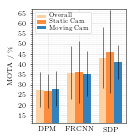

In [2229]:
f, ax = plt.subplots(1, 1, figsize=(1.7,2.1))

cmap = cm.get_cmap('tab20c')
width = 0.5
tracker_type = "baseline"

# DPM
mask = motas.benchmark.isin(["MOT17"]) & motas.tracker_type.isin([tracker_type]) & motas.detector.isin(["DPM"]) & motas.global_motion.isin(["overall"])
ax.bar(0, motas[mask]["mean_mota"], width=width, yerr=motas[mask]["std_mota"], color=cmap(7))

mask = motas.benchmark.isin(["MOT17"]) & motas.tracker_type.isin([tracker_type]) & motas.detector.isin(["DPM"]) & motas.global_motion.isin(["static"])
ax.bar(0.5, motas[mask]["mean_mota"], width=width, yerr=motas[mask]["std_mota"], color=cmap(5))

mask = motas.benchmark.isin(["MOT17"]) & motas.tracker_type.isin([tracker_type]) & motas.detector.isin(["DPM"]) & motas.global_motion.isin(["moving"])
ax.bar(1, motas[mask]["mean_mota"], width=width, yerr=motas[mask]["std_mota"], color=cmap(0))

# FRCNN
mask = motas.benchmark.isin(["MOT17"]) & motas.tracker_type.isin([tracker_type]) & motas.detector.isin(["FRCNN"]) & motas.global_motion.isin(["overall"])
ax.bar(2, motas[mask]["mean_mota"], width=width, yerr=motas[mask]["std_mota"], color=cmap(7))

mask = motas.benchmark.isin(["MOT17"]) & motas.tracker_type.isin([tracker_type]) & motas.detector.isin(["FRCNN"]) & motas.global_motion.isin(["static"])
ax.bar(2.5, motas[mask]["mean_mota"], width=width, yerr=motas[mask]["std_mota"], color=cmap(5))

mask = motas.benchmark.isin(["MOT17"]) & motas.tracker_type.isin([tracker_type]) & motas.detector.isin(["FRCNN"]) & motas.global_motion.isin(["moving"])
ax.bar(3, motas[mask]["mean_mota"], width=width, yerr=motas[mask]["std_mota"], color=cmap(0))

# SDP
mask = motas.benchmark.isin(["MOT17"]) & motas.tracker_type.isin([tracker_type]) & motas.detector.isin(["SDP"]) & motas.global_motion.isin(["overall"])
ax.bar(4, motas[mask]["mean_mota"], width=width, yerr=motas[mask]["std_mota"], color=cmap(7))

mask = motas.benchmark.isin(["MOT17"]) & motas.tracker_type.isin([tracker_type]) & motas.detector.isin(["SDP"]) & motas.global_motion.isin(["static"])
ax.bar(4.5, motas[mask]["mean_mota"], width=width, yerr=motas[mask]["std_mota"], color=cmap(5))

mask = motas.benchmark.isin(["MOT17"]) & motas.tracker_type.isin([tracker_type]) & motas.detector.isin(["SDP"]) & motas.global_motion.isin(["moving"])
ax.bar(5, motas[mask]["mean_mota"], width=width, yerr=motas[mask]["std_mota"], color=cmap(0))

leg = ax.legend(["Overall", "Static Cam", "Moving Cam"], loc=2, ncol=1)
leg.get_frame().set_linewidth(0.5)
ax.set_ylabel("MOTA / \%")
#ax.set_xlabel("Detector")
ax.set_xticks([0.5, 2.5, 4.5])
ax.set_xticklabels(["DPM", "FRCNN", "SDP"])
ax.tick_params(axis='x', which='both',length=0)
ax.set_yticks(np.arange(0, 101, 5))
ax.set_yticks(np.arange(0, 101, 1), minor=True)
ax.set_ylim([11, 67])
ax.grid(which='major')
ax.grid(which='minor', linestyle="dotted")
ax.set_axisbelow(True)

plt.savefig("plot_detector_influence_baseline.pdf", bbox_inches="tight", pad_inches=0.01)
plt.show()

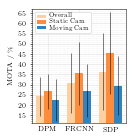

In [2231]:
f, ax = plt.subplots(1, 1, figsize=(1.7,2.1))

cmap = cm.get_cmap('tab20c')
width = 0.5
tracker_type = "TinyTCNN"

# DPM
mask = motas.benchmark.isin(["MOT17"]) & motas.tracker_type.isin([tracker_type]) & motas.detector.isin(["DPM"]) & motas.global_motion.isin(["overall"])
ax.bar(0, motas[mask]["mean_mota"], width=width, yerr=motas[mask]["std_mota"], color=cmap(7))

mask = motas.benchmark.isin(["MOT17"]) & motas.tracker_type.isin([tracker_type]) & motas.detector.isin(["DPM"]) & motas.global_motion.isin(["static"])
ax.bar(0.5, motas[mask]["mean_mota"], width=width, yerr=motas[mask]["std_mota"], color=cmap(5))

mask = motas.benchmark.isin(["MOT17"]) & motas.tracker_type.isin([tracker_type]) & motas.detector.isin(["DPM"]) & motas.global_motion.isin(["moving"])
ax.bar(1, motas[mask]["mean_mota"], width=width, yerr=motas[mask]["std_mota"], color=cmap(0))

# FRCNN
mask = motas.benchmark.isin(["MOT17"]) & motas.tracker_type.isin([tracker_type]) & motas.detector.isin(["FRCNN"]) & motas.global_motion.isin(["overall"])
ax.bar(2, motas[mask]["mean_mota"], width=width, yerr=motas[mask]["std_mota"], color=cmap(7))

mask = motas.benchmark.isin(["MOT17"]) & motas.tracker_type.isin([tracker_type]) & motas.detector.isin(["FRCNN"]) & motas.global_motion.isin(["static"])
ax.bar(2.5, motas[mask]["mean_mota"], width=width, yerr=motas[mask]["std_mota"], color=cmap(5))

mask = motas.benchmark.isin(["MOT17"]) & motas.tracker_type.isin([tracker_type]) & motas.detector.isin(["FRCNN"]) & motas.global_motion.isin(["moving"])
ax.bar(3, motas[mask]["mean_mota"], width=width, yerr=motas[mask]["std_mota"], color=cmap(0))

# SDP
mask = motas.benchmark.isin(["MOT17"]) & motas.tracker_type.isin([tracker_type]) & motas.detector.isin(["SDP"]) & motas.global_motion.isin(["overall"])
ax.bar(4, motas[mask]["mean_mota"], width=width, yerr=motas[mask]["std_mota"], color=cmap(7))

mask = motas.benchmark.isin(["MOT17"]) & motas.tracker_type.isin([tracker_type]) & motas.detector.isin(["SDP"]) & motas.global_motion.isin(["static"])
ax.bar(4.5, motas[mask]["mean_mota"], width=width, yerr=motas[mask]["std_mota"], color=cmap(5))

mask = motas.benchmark.isin(["MOT17"]) & motas.tracker_type.isin([tracker_type]) & motas.detector.isin(["SDP"]) & motas.global_motion.isin(["moving"])
ax.bar(5, motas[mask]["mean_mota"], width=width, yerr=motas[mask]["std_mota"], color=cmap(0))

leg = ax.legend(["Overall", "Static Cam", "Moving Cam"], loc=2, ncol=1)
leg.get_frame().set_linewidth(0.5)
ax.set_ylabel("MOTA / \%")
#ax.set_xlabel("Detector")
ax.set_xticks([0.5, 2.5, 4.5])
ax.set_xticklabels(["DPM", "FRCNN", "SDP"])
ax.tick_params(axis='x', which='both',length=0)
ax.set_yticks(np.arange(0, 101, 5))
ax.set_yticks(np.arange(0, 101, 1), minor=True)
ax.set_ylim([11, 67])
ax.grid(which='major')
ax.grid(which='minor', linestyle="dotted")
ax.set_axisbelow(True)

plt.savefig("plot_detector_influence_deep_dense.pdf", bbox_inches="tight", pad_inches=0.01)
plt.show()